# Read the CSV file of Ribosomal genes

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df_all = pd.read_csv('pollen_ribo_metrics.csv')

In [3]:
df_all.head()

,RPL22,RPL11,RPS8,RPL5,RPS27,RPS24,RPLP2,RPL27A,RPS13,RPS3,...,RPL30,RPL8,RPS6,RPL35,RPL12,RPL7A,RPS4X,RPL39,RPL10,Num Genes > 0
2015_16_FVZ_AP2_A1,246.5710,12.9774,1229.6100,2043.940,6.4887,0.000,0.0000,0.000,986.283,3.2444,...,522.3410,25.9548,3305.990,768.9110,0.000,0.0000,0.0000,0.0000,0.0000,681
2015_16_FVZ_AP2_A10,24.0352,537.3590,15.4512,1311.640,154.5120,235.202,27.4688,410.316,336.493,775.9950,...,85.8402,0.0000,1036.950,27.4688,135.627,48.0705,37.7697,60.0881,384.5640,2737
2015_16_FVZ_AP2_A11,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.000,4184.100,0.0000,...,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,198
2015_16_FVZ_AP2_A12,358.0360,80.4397,165.6110,386.426,206.6200,346.995,64.6672,130.912,383.272,1020.4800,...,151.4160,359.6130,637.209,126.1800,258.669,733.4210,365.9220,111.9850,1387.9800,4677
2015_16_FVZ_AP2_A2,63.5354,342.3850,12.3541,105.892,8.8244,363.564,0.0000,598.292,363.564,762.4250,...,52.9462,10.5892,0.000,157.0740,0.000,1925.4800,3.5298,109.4220,58.2408,2457


In [4]:
# Remove the 'Num Genes > 0' column for now, since there is no explanation of what it means.
df = df_all.iloc[:,:-1]

# Visualize one gene for log-scale bimodal distribution

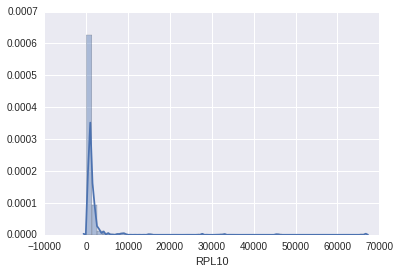

In [5]:
sns.distplot(df['RPL10'])

In [6]:
import numpy as np
df_log = np.log(df['RPL10'])

In [7]:
df_log.head()

2015_16_FVZ_AP2_A1         -inf
2015_16_FVZ_AP2_A10    5.952110
2015_16_FVZ_AP2_A11        -inf
2015_16_FVZ_AP2_A12    7.235605
2015_16_FVZ_AP2_A2     4.064586
Name: RPL10, dtype: float64

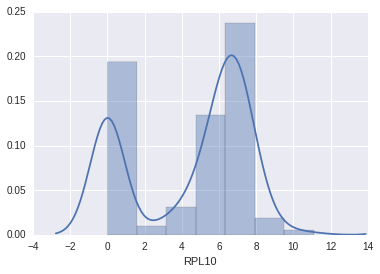

In [8]:
# Replace -inf for visualization as it causes problems with seaborn's plotting.
sns.distplot(df_log.replace(-float('Inf'), 0))

# Visualize all genes to check whether bimodal

In [9]:
df_log = np.log(df)
# Stack the gene columns into one column for plotting.
df_log = df_log.stack().reset_index()
df_log.columns = ['cell', 'gene', 'log(reads)']
# Remove -inf to keep seaborn happy.
df_log['log(reads)'] = df_log['log(reads)'].replace(-float('Inf'), 0)

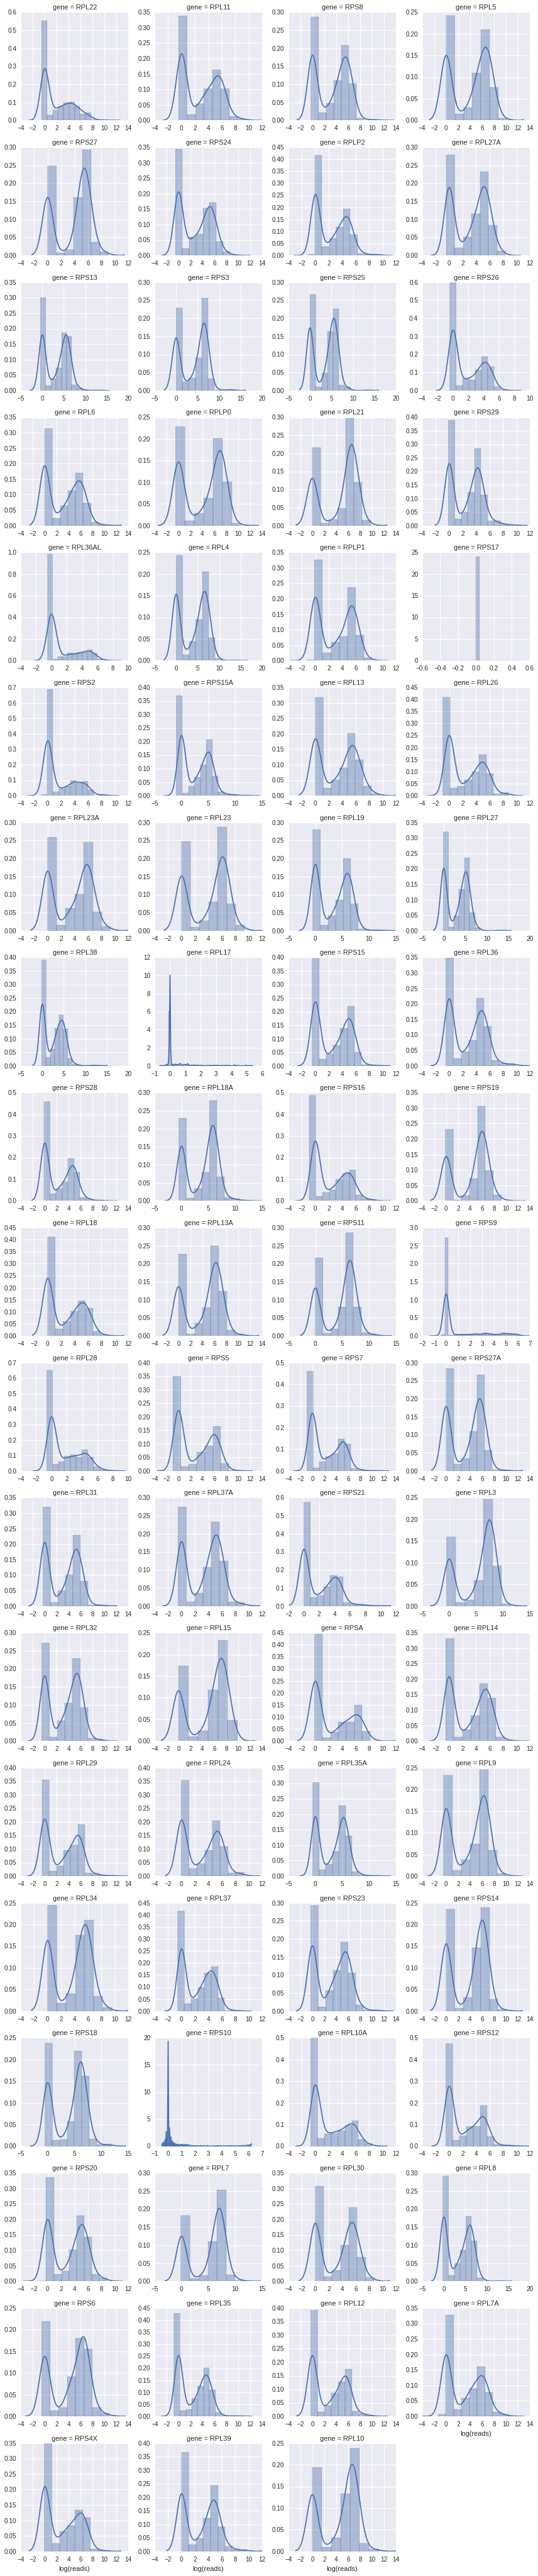

In [10]:
# Create the grid.
g = sns.FacetGrid(df_log, col='gene', col_wrap=4, sharex=False, sharey=False)
# Populate the grid.
g.map(sns.distplot, 'log(reads)')

# Check expression per cell for 1:1:1:1:...

In [11]:
df_log_cell = df_log.pivot('cell', 'gene', 'log(reads)')
df_log_cell.head()

gene,RPL10,RPL10A,RPL11,RPL12,RPL13,RPL13A,RPL14,RPL15,RPL17,RPL18,...,RPS28,RPS29,RPS3,RPS4X,RPS5,RPS6,RPS7,RPS8,RPS9,RPSA
cell,,,,,,,,,,,,,,,,,,,,,
2015_16_FSZ_AP2_A1,6.133081,2.280278,4.557544,5.504140,6.378779,5.191267,2.765784,6.334233,0.000000,4.979956,...,5.076030,4.744132,6.935429,5.832047,6.002953,5.856827,0.000000,4.607557,3.245358,6.963568
2015_16_FSZ_AP2_A10,6.348616,5.455270,6.359110,2.266854,7.291554,6.923186,6.251195,7.680725,0.880539,6.520689,...,4.958092,4.653322,4.869540,0.187392,0.000000,6.902793,2.266854,7.381844,0.000000,6.822043
2015_16_FSZ_AP2_A11,4.421107,0.000000,5.035783,6.198615,5.621299,6.219136,5.497459,8.091419,0.000000,4.164387,...,4.075157,3.991775,7.071556,0.450821,6.305887,6.498187,6.301580,5.497459,5.503871,0.000000
2015_16_FSZ_AP2_A12,6.503204,5.343033,5.399989,5.532654,6.470530,6.326607,4.103010,6.115378,-0.266443,5.197397,...,1.119852,4.222198,5.946169,3.758914,5.749721,6.156809,4.443092,4.845548,0.000000,5.971887
2015_16_FSZ_AP2_A2,5.381265,0.000000,5.381265,5.381265,0.000000,5.381265,0.000000,5.381265,0.000000,0.000000,...,5.381265,0.000000,5.381265,5.381265,0.000000,5.381265,5.381265,0.000000,0.000000,0.000000


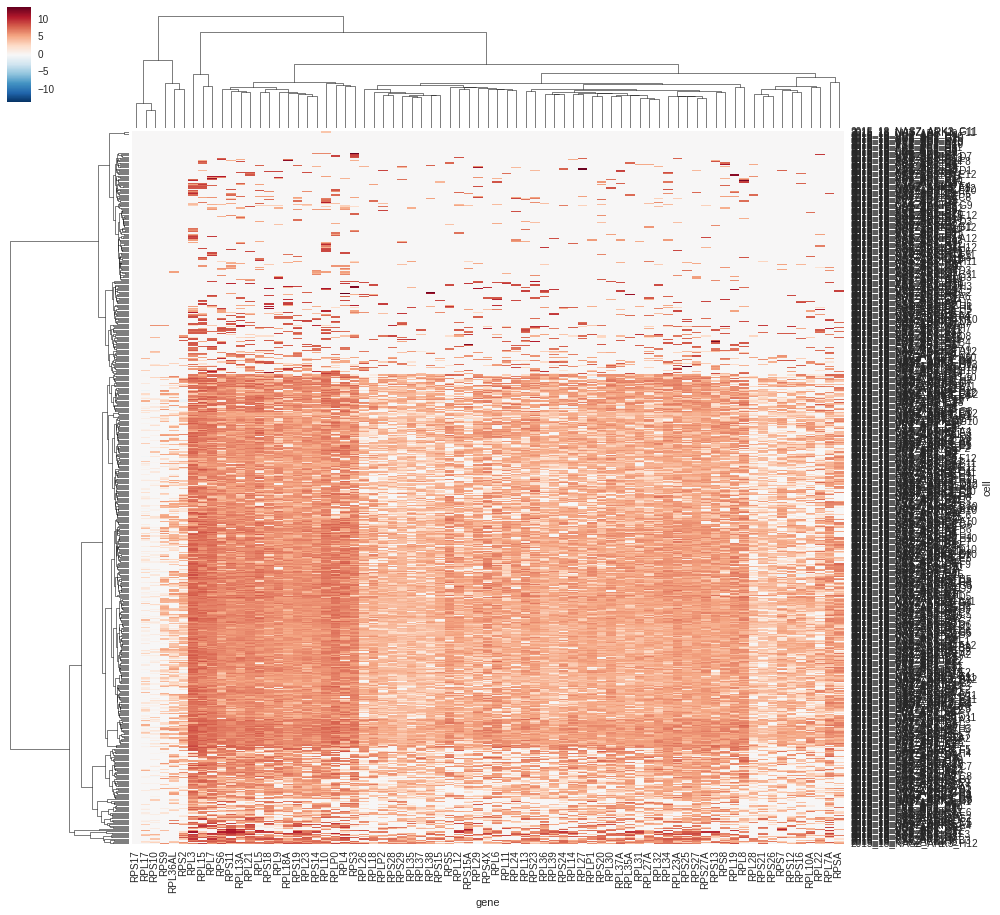

In [12]:
sns.clustermap(df_log_cell, figsize=(15,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0xa4640c2c>,
       <matplotlib.axes._subplots.AxesSubplot object at 0xa4622fcc>], dtype=object)

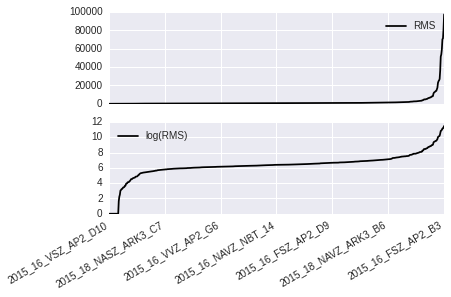

In [13]:
df_sq = df.T ** 2
s_rms = np.sqrt(df_sq.mean())
s_rms.sort()
s_rms
s_rms_log = np.log(s_rms).replace(-float('Inf'),0)
df_rms_both = pd.DataFrame({'RMS': s_rms, 'log(RMS)': s_rms_log})
df_rms_both.plot(subplots=True)